# Exploratory Data Analysis

#### TLDR (Too long didn't read)

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv("../data/clean/data.csv")

# Data Set Info

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   treatment_company       1000 non-null   object 
 1   azimuth                 945 non-null    float64
 2   md_ft                   1000 non-null   int64  
 3   tvd_ft                  980 non-null    float64
 4   date_on_production      1000 non-null   object 
 5   operator                1000 non-null   object 
 6   footage_lateral_length  1000 non-null   float64
 7   well_spacing            844 non-null    float64
 8   porpoise_deviation      1000 non-null   float64
 9   porpoise_count          1000 non-null   int64  
 10  shale_footage           1000 non-null   int64  
 11  acoustic_impedance      1000 non-null   float64
 12  log_permeability        1000 non-null   float64
 13  porosity                881 non-null    float64
 14  poisson_ratio           1000 non-null   f

# Summary Statistics

In [80]:
df.describe().round(2)

,azimuth,md_ft,tvd_ft,footage_lateral_length,well_spacing,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,...,breakdown_pressure,pump_rate,total_number_of_stages,proppant_volume,proppant_fluid_ratio,production,difference_in_days,difference_in_weeks,difference_in_years,year_on_production
count,945.00,1000.00,980.00,1000.00,844.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,256.00,1000.00,1000.00,868.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,-33.91,13988.39,7103.62,6387.05,2223.23,50.46,9.44,3784.83,33492.84,0.62,...,7365.95,85.05,28.82,10608800.76,1.17,1949.92,3196.01,456.57,8.76,2014.99
std,17.98,2584.32,896.95,2520.33,1255.06,118.44,6.88,3703.78,2074.39,0.39,...,1484.09,12.51,15.52,6404057.62,0.38,1351.49,835.50,119.36,2.29,2.23
min,-87.25,8642.00,4859.00,1329.00,335.46,0.03,0.00,0.00,26740.05,-0.03,...,4364.00,2.00,9.00,176096.00,0.03,76.11,1783.00,254.71,4.88,2011.00
25%,-46.22,12157.50,6407.00,4668.00,1084.53,4.66,4.00,0.00,32718.46,0.31,...,6102.75,77.00,16.00,6146848.50,0.95,1003.90,2391.00,341.57,6.55,2013.00
50%,-32.99,13659.50,6977.00,5927.00,1999.30,10.88,8.00,3591.50,34592.22,0.52,...,7018.00,86.00,26.00,9082286.00,1.12,1568.68,3244.00,463.43,8.89,2015.00
75%,-22.58,15468.00,7820.00,7744.00,3090.20,30.54,13.00,6081.75,34819.79,0.87,...,8868.25,95.00,39.00,13661052.75,1.33,2621.21,3883.00,554.71,10.64,2017.00
max,22.94,27797.00,9639.00,19849.00,5225.09,1106.13,39.00,17763.00,38057.63,1.94,...,11116.00,110.00,110.00,41950368.00,5.41,8880.67,4795.00,685.00,13.14,2019.00


# Missing Values

- Currently breakdown_pressure and water_saturtation have more than half of its values missing. 
- It "might" be appropiate to drop this columns (breakdown_pressure and water_saturation).
- Basic imputation techniques will be explored in the modeling section (mean, median and knn imputation).

In [81]:
missing_values = pd.DataFrame(df.isna().sum(), columns=["Missing Values"]).sort_values(by="Missing Values", ascending=False)
missing_values = missing_values[missing_values["Missing Values"]>0]
missing_values["Percentage"] = missing_values["Missing Values"]/df.shape[0]
missing_values

,Missing Values,Percentage
breakdown_pressure,744,0.744
water_saturation,577,0.577
well_spacing,156,0.156
proppant_volume,132,0.132
porosity,119,0.119
isip,77,0.077
azimuth,55,0.055
toc,21,0.021
tvd_ft,20,0.020
youngs_modulus,19,0.019


### Visualize missing data

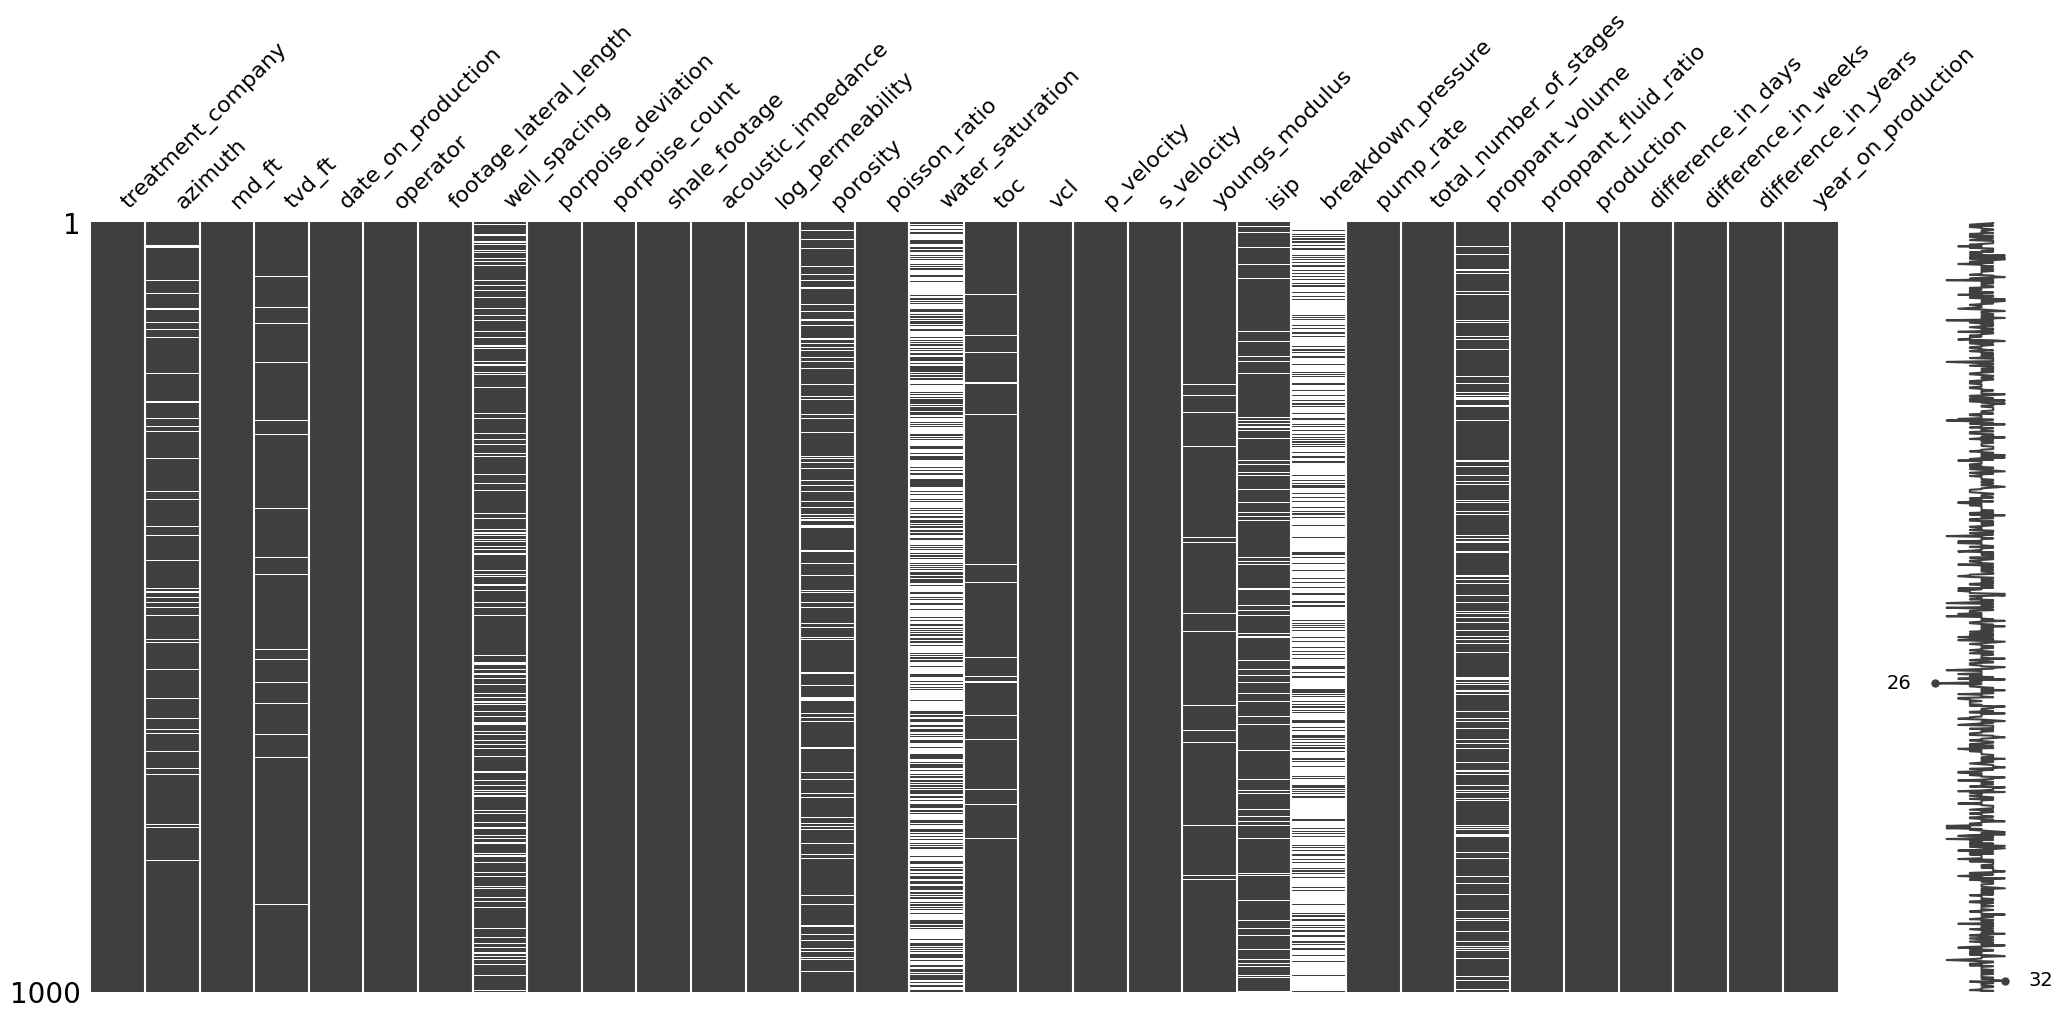

In [82]:
msno.matrix(df)
plt.savefig("../images/eda/missing_values/missing_values.png", bbox_inches="tight")
plt.show()

In [83]:
numerical_columns = list(df.drop(["treatment_company", "operator", "date_on_production"], axis=1).columns)
categorical_columns = ["treatment_company", "operator"]

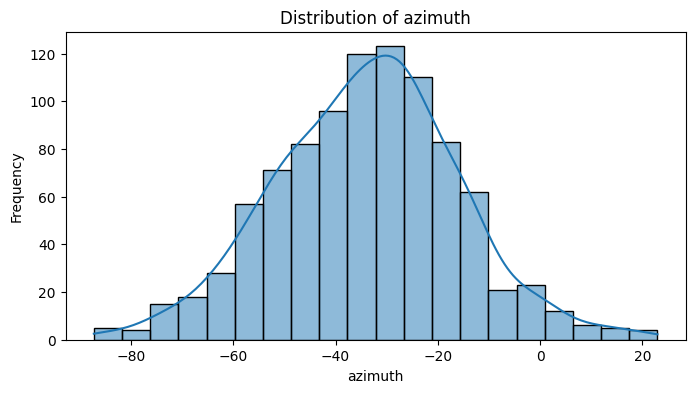

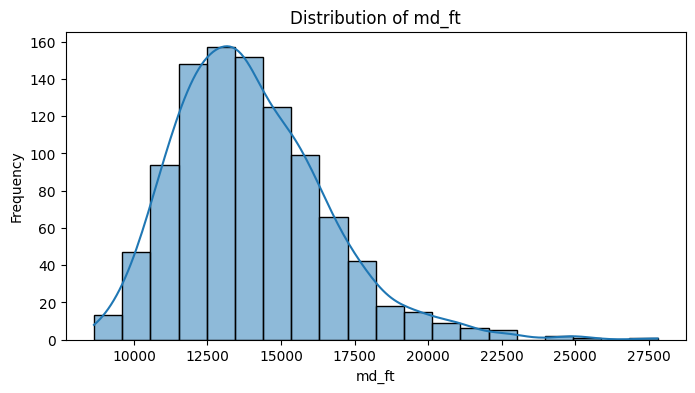

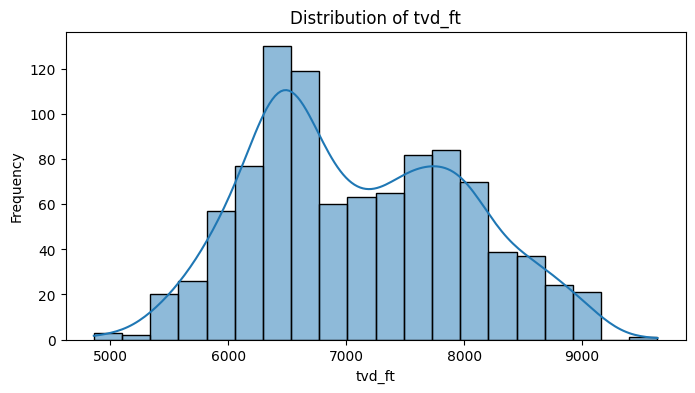

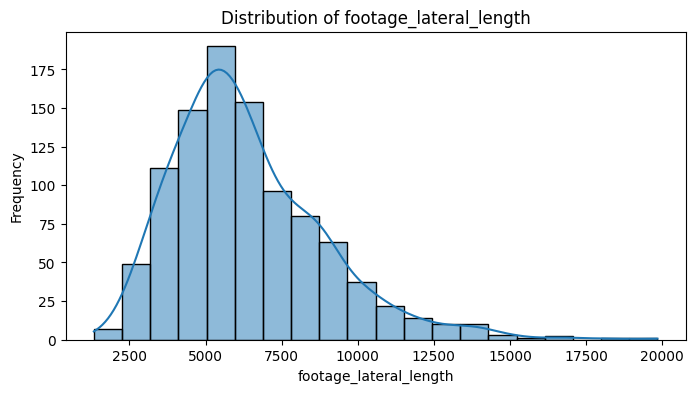

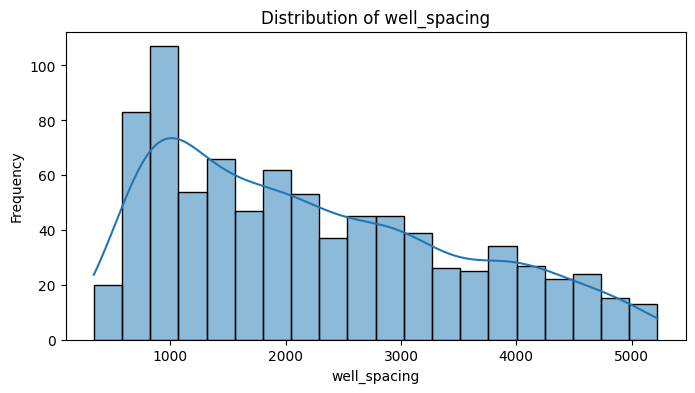

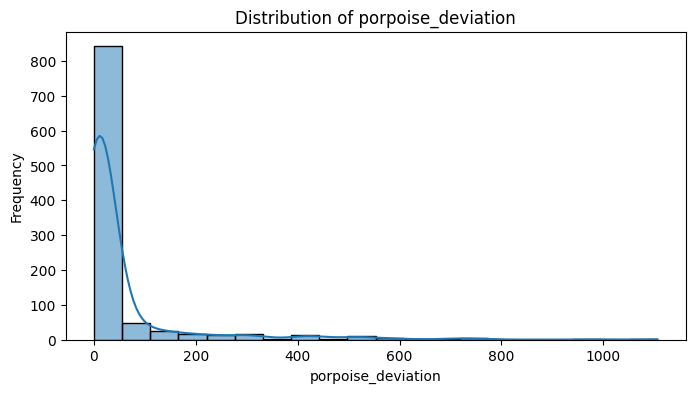

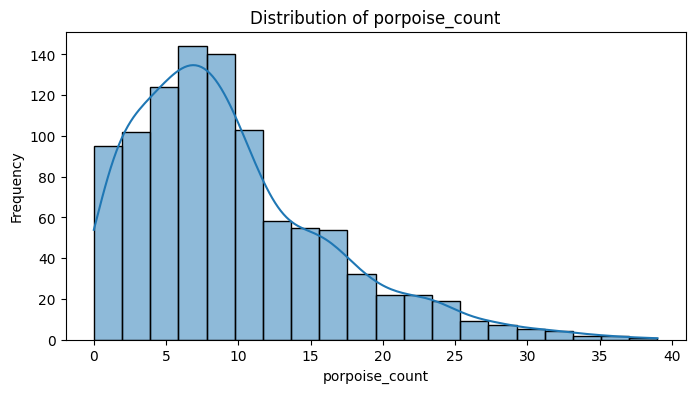

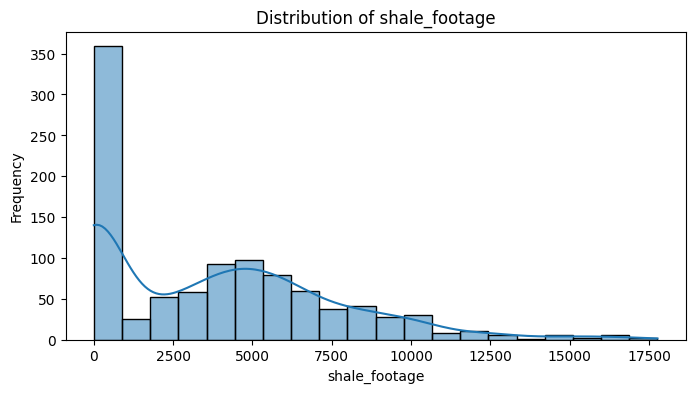

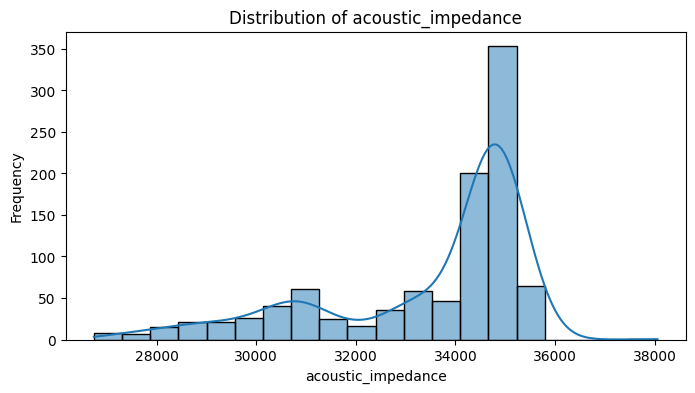

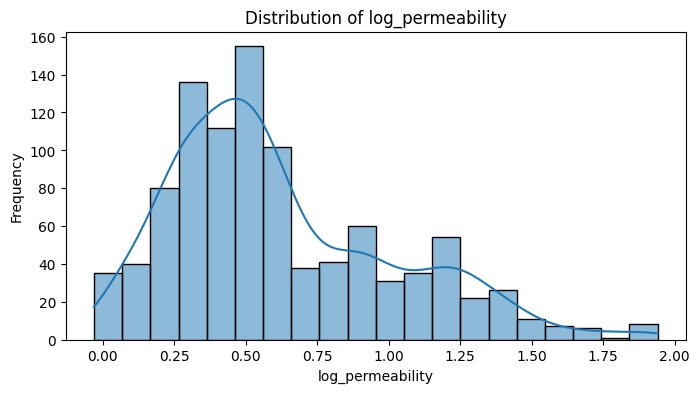

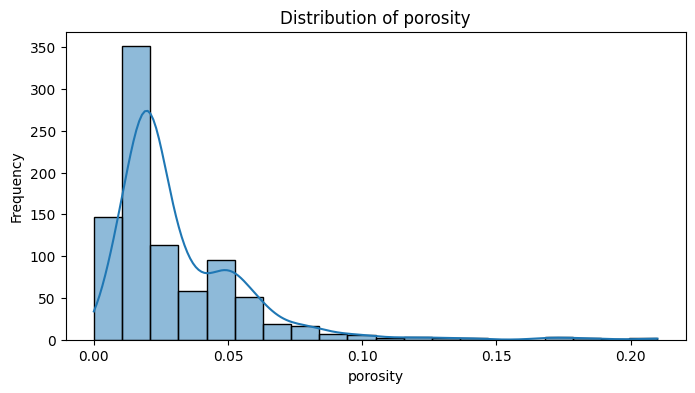

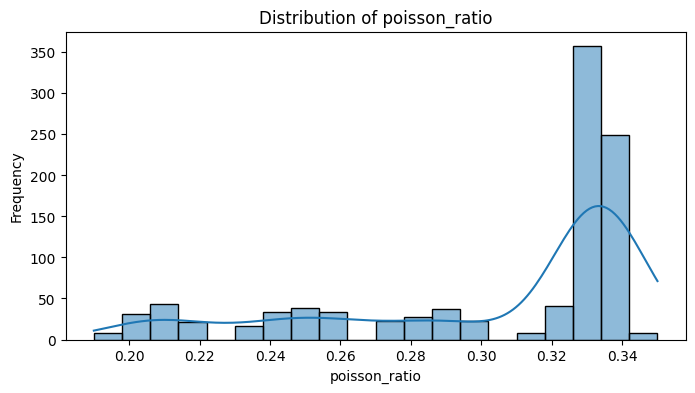

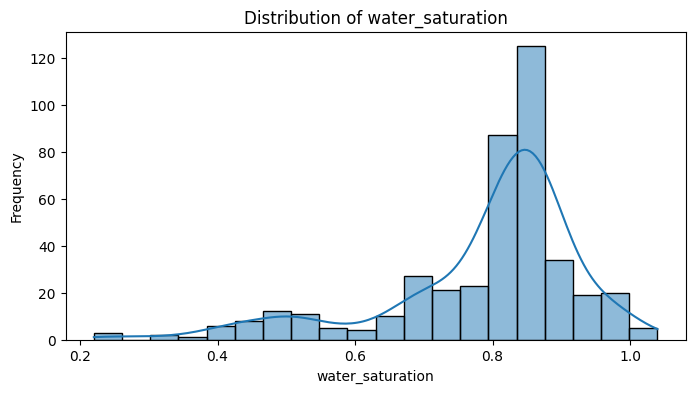

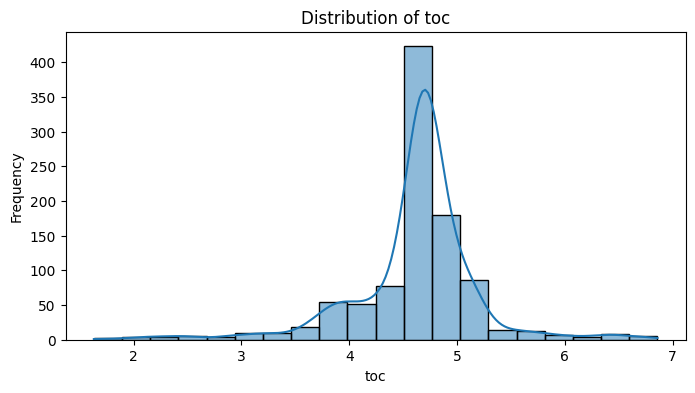

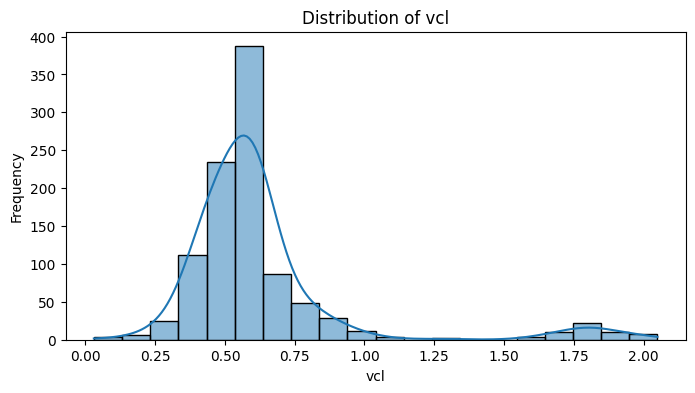

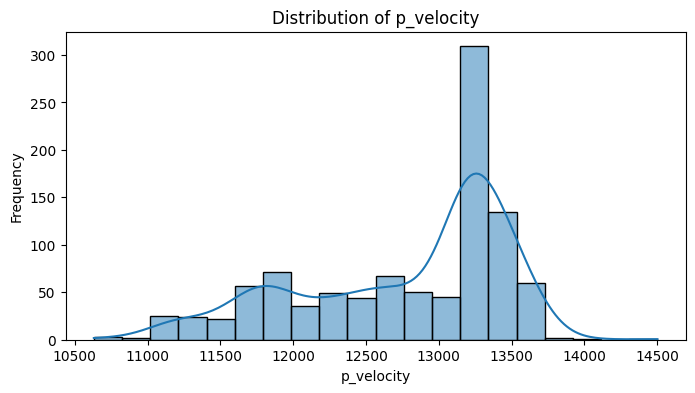

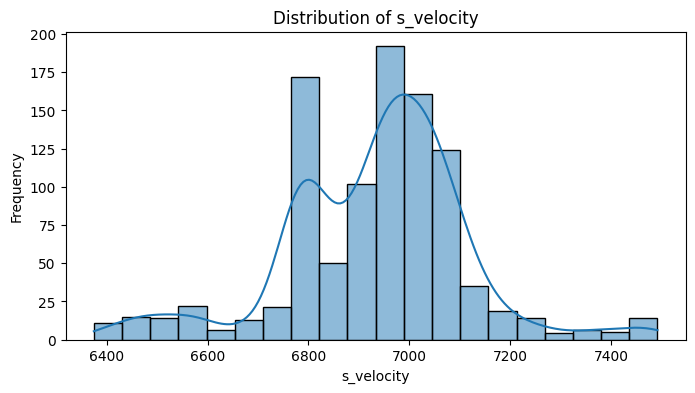

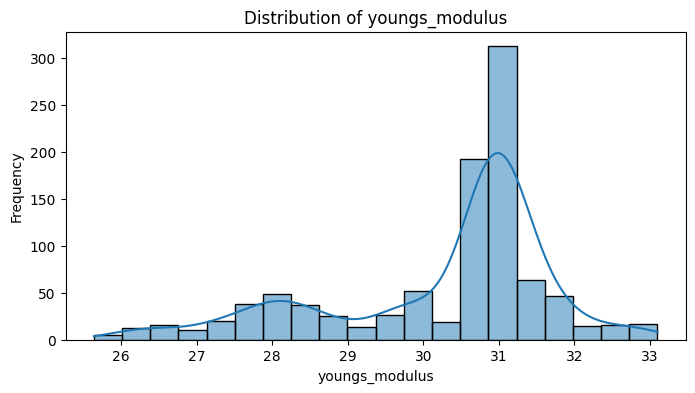

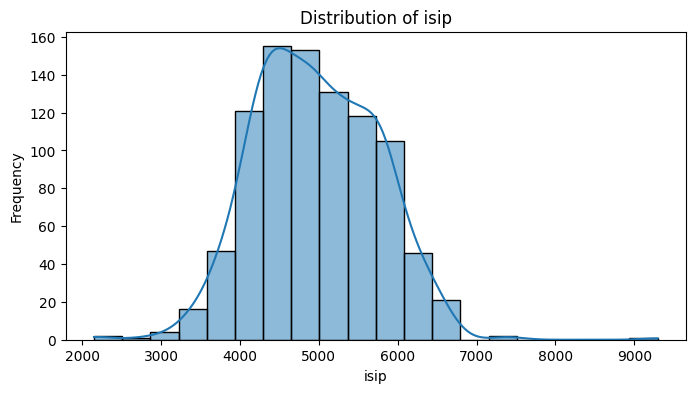

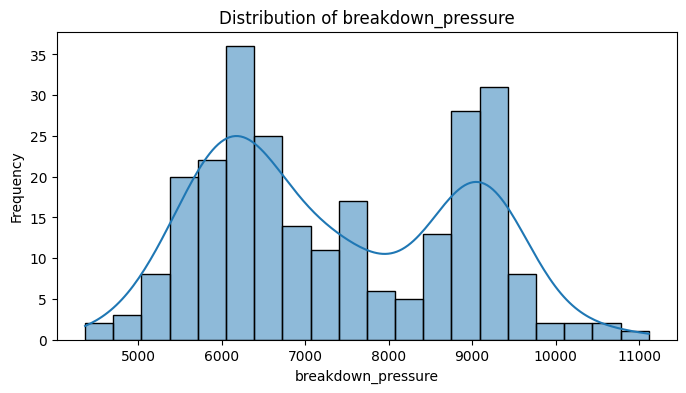

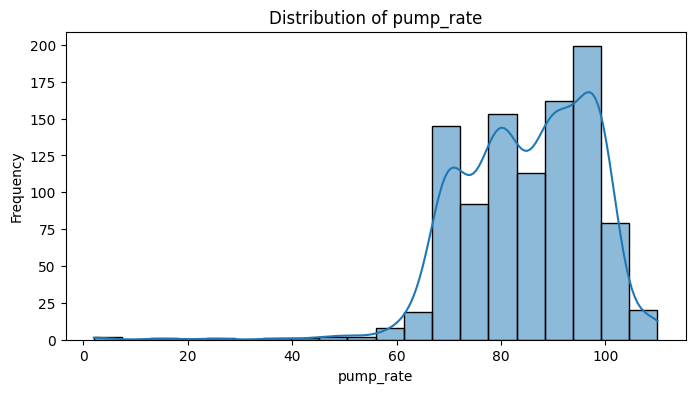

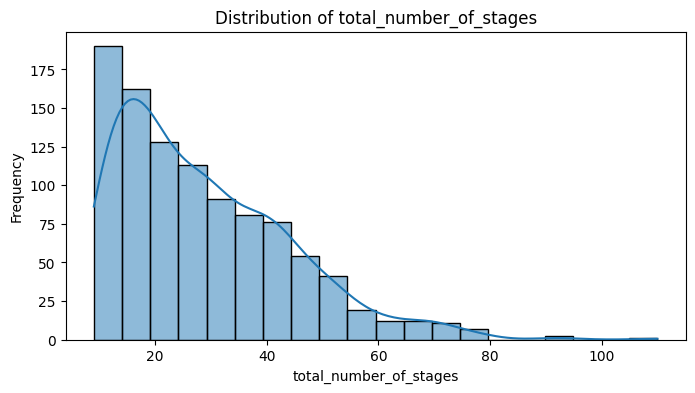

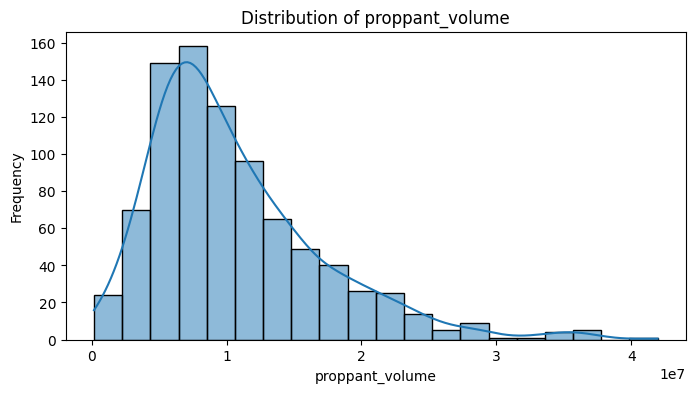

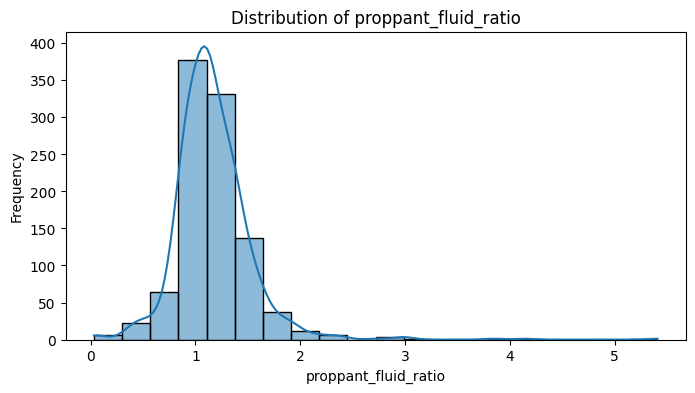

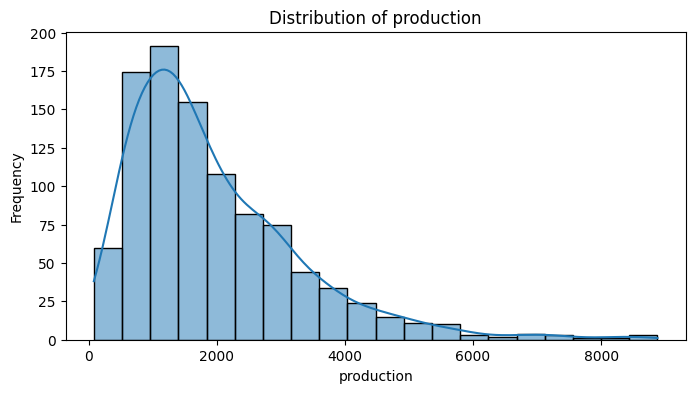

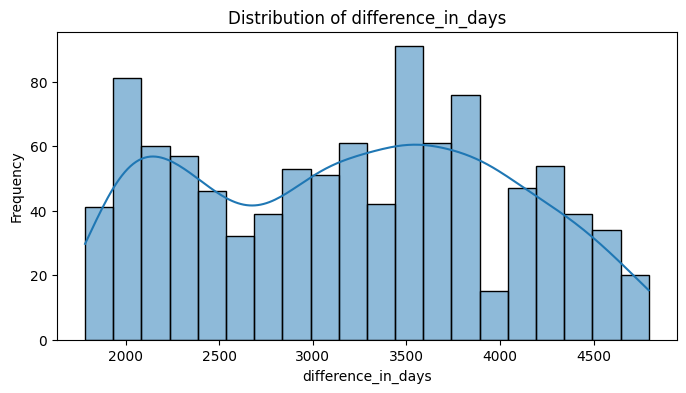

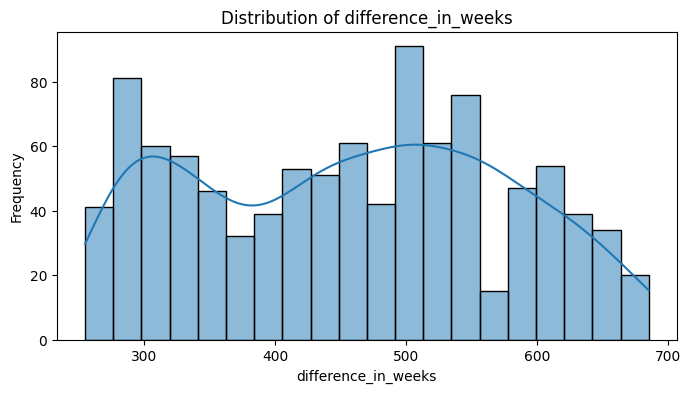

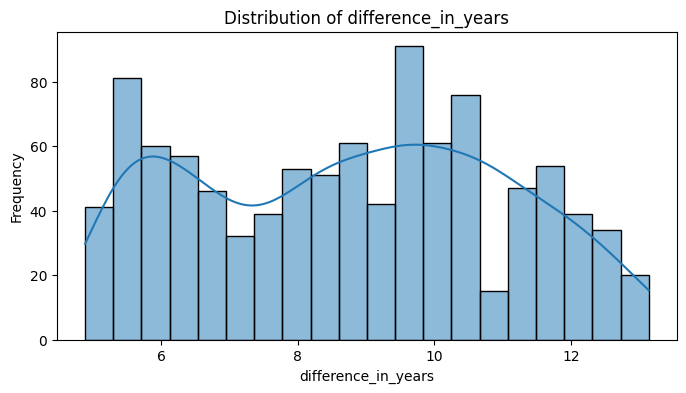

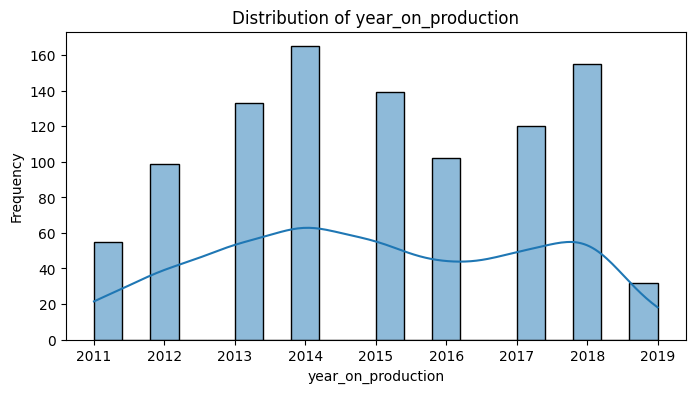

In [84]:
for numerical_column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[numerical_column], bins=20, kde=True)
    plt.title(f"Distribution of {numerical_column}")
    plt.xlabel(numerical_column)
    plt.ylabel("Frequency")
    plt.savefig(f"../images/eda/histograms/{numerical_column}.png", bbox_inches="tight")
    plt.show()

# Box Plots

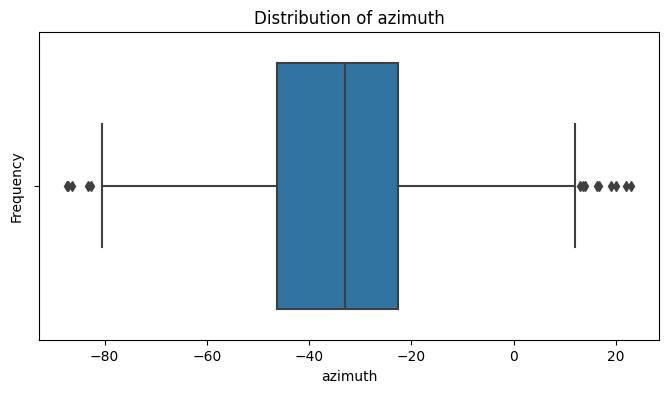

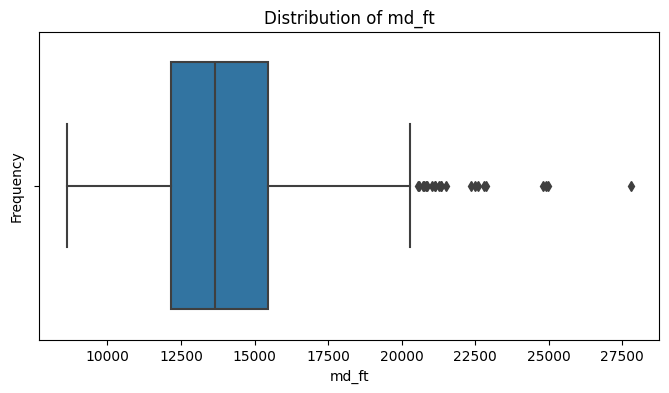

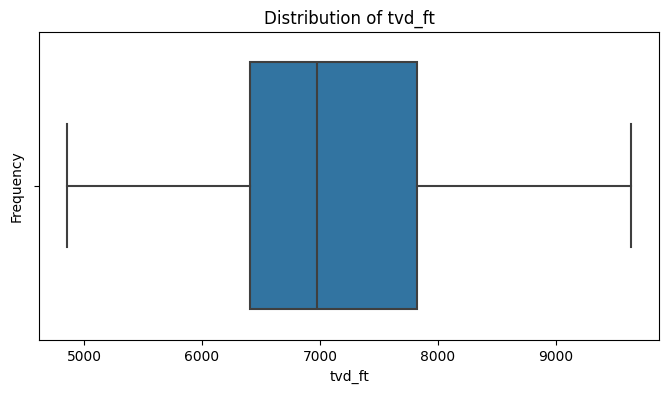

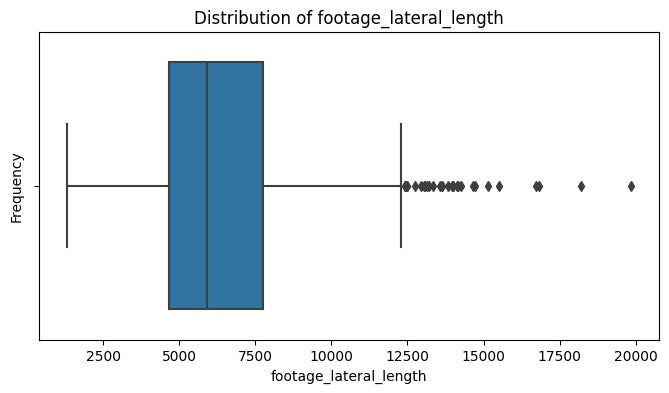

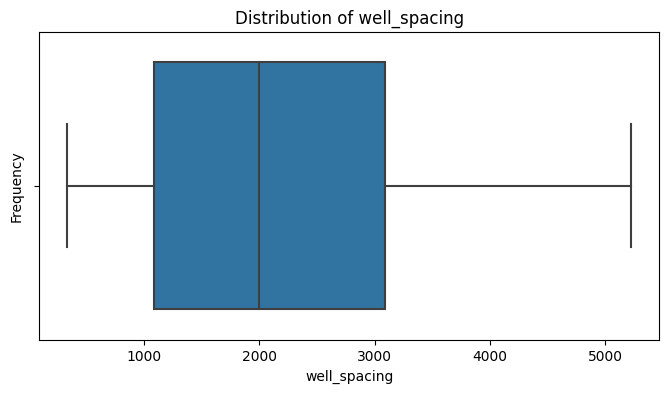

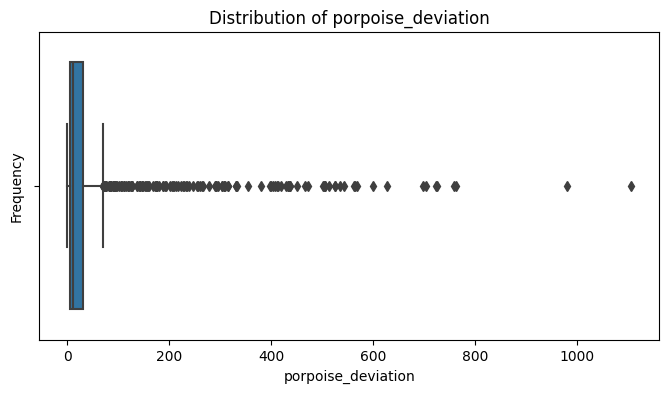

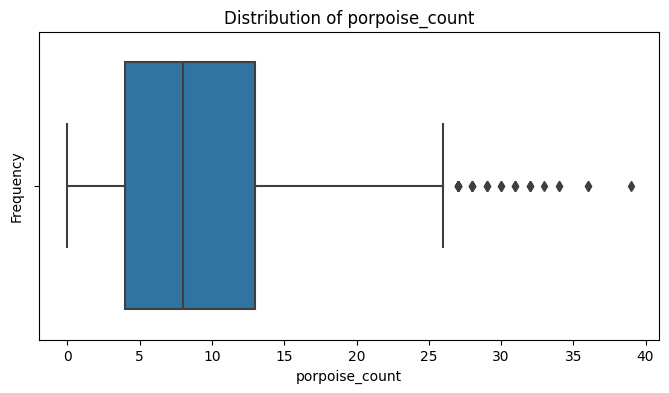

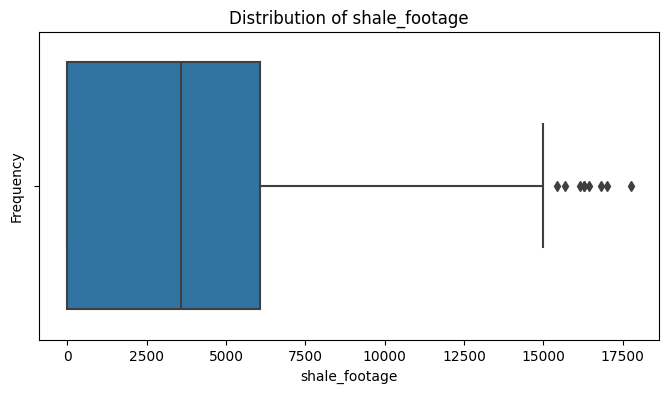

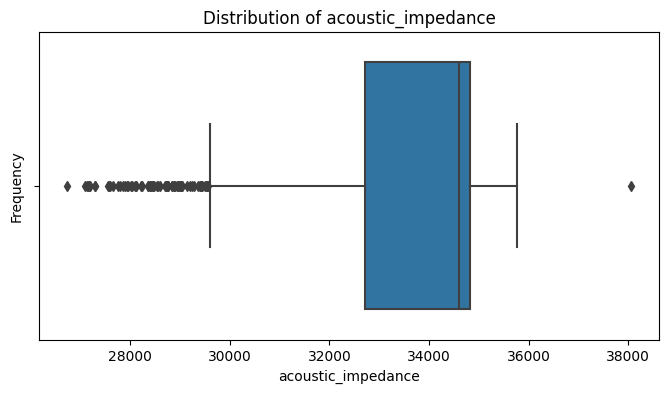

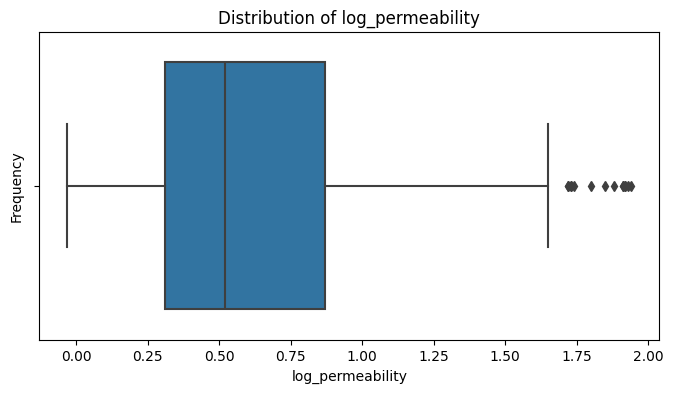

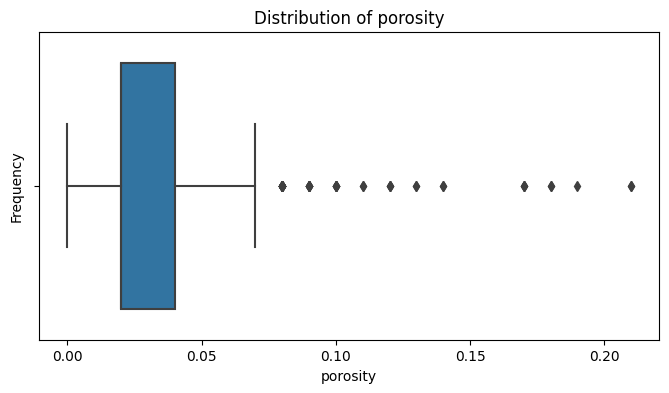

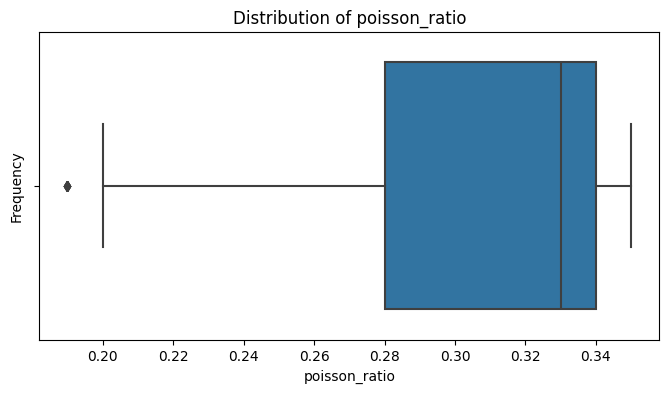

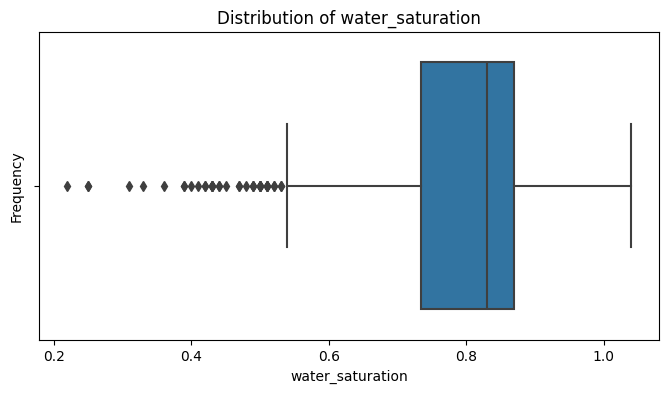

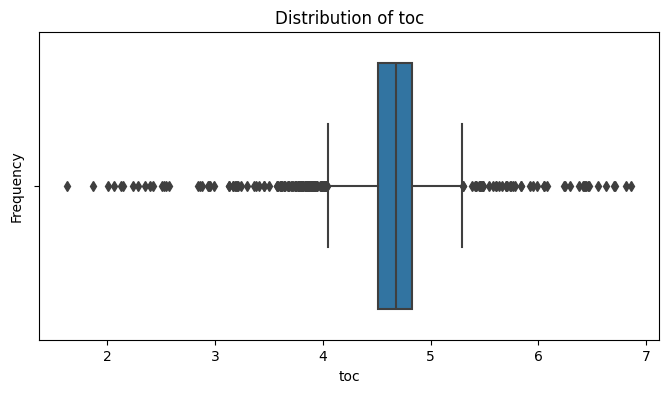

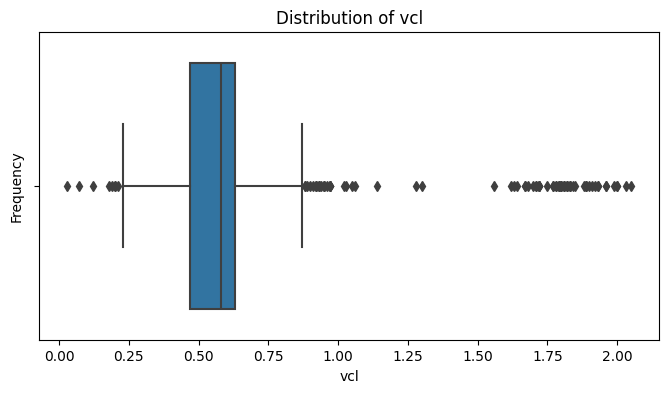

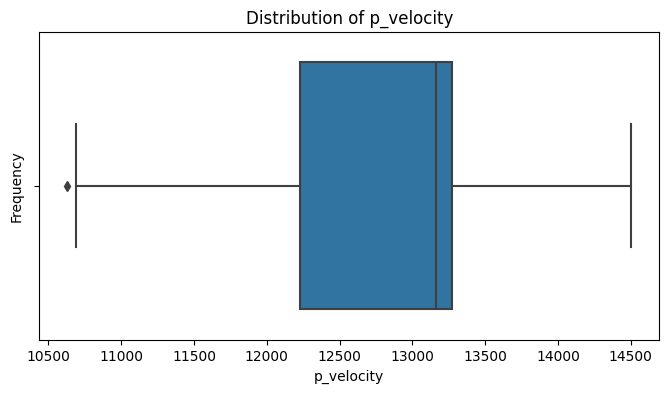

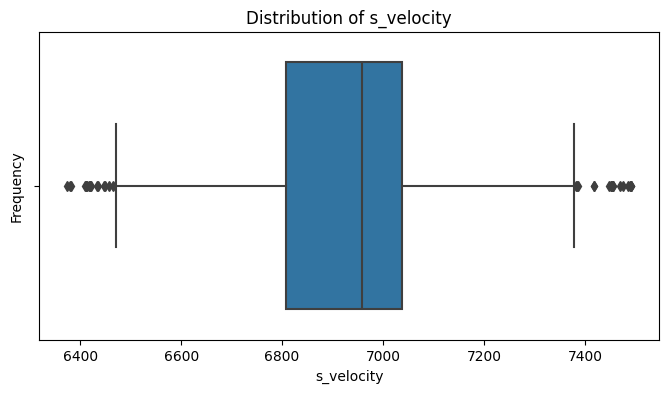

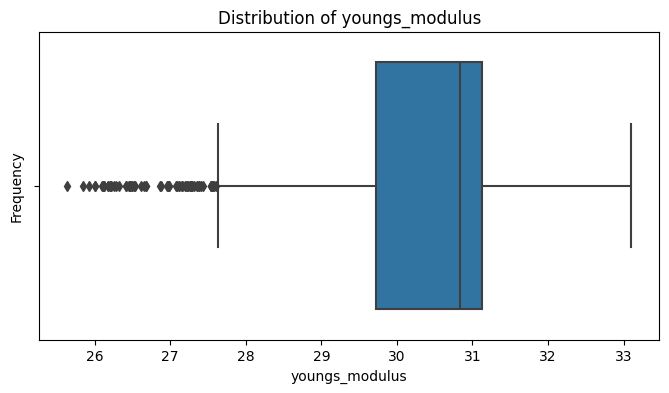

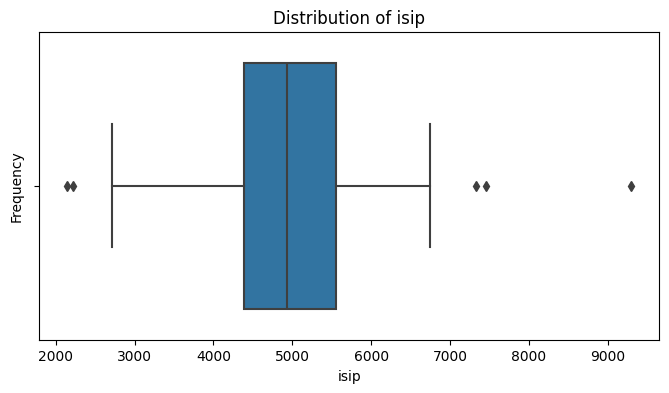

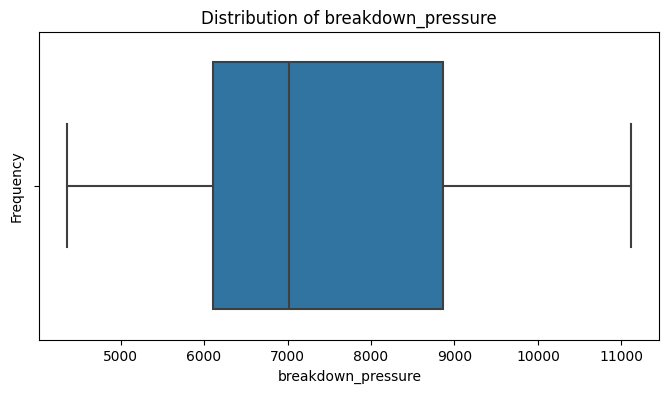

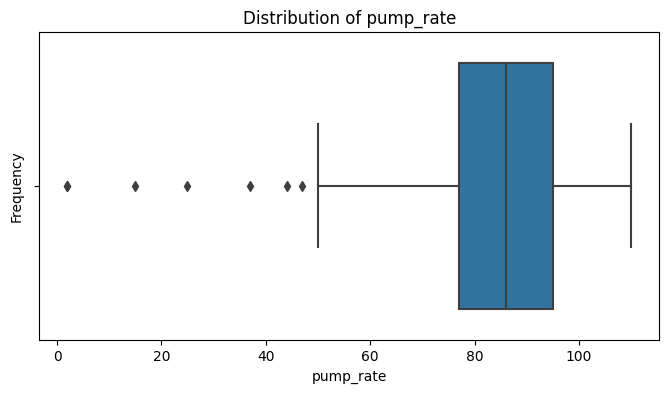

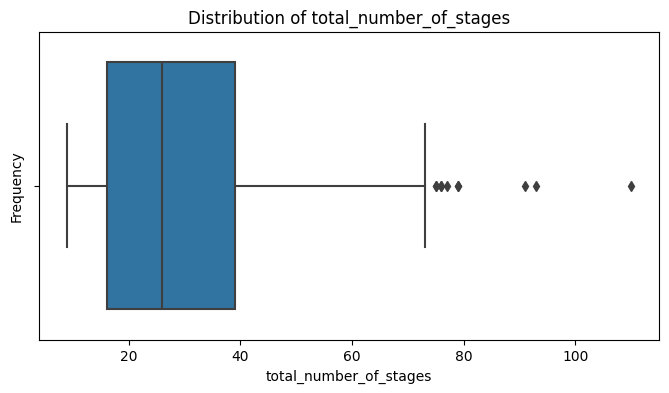

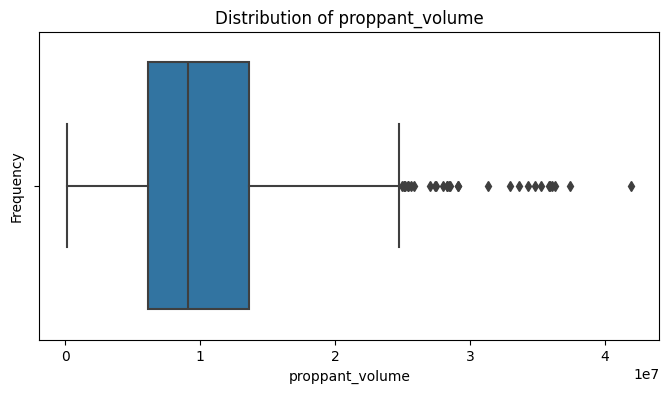

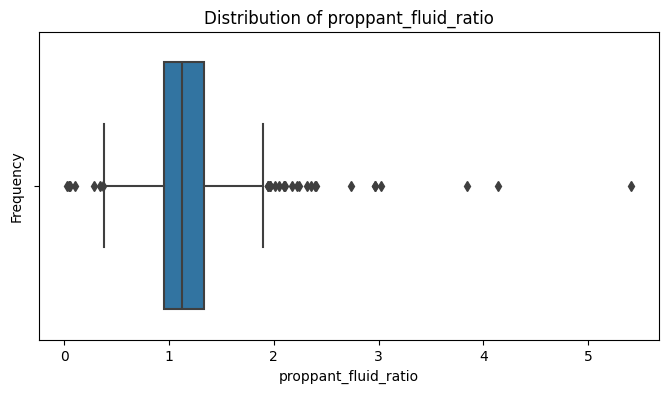

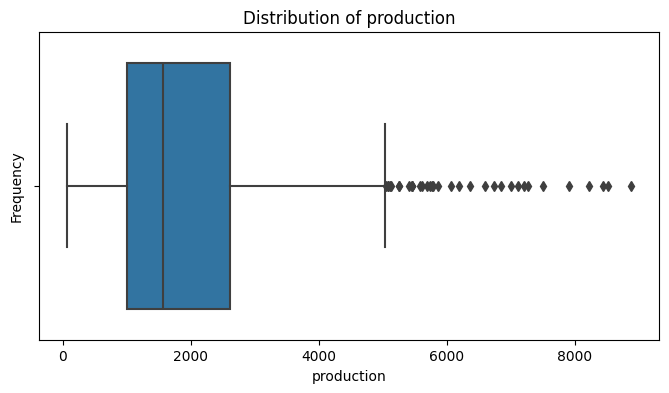

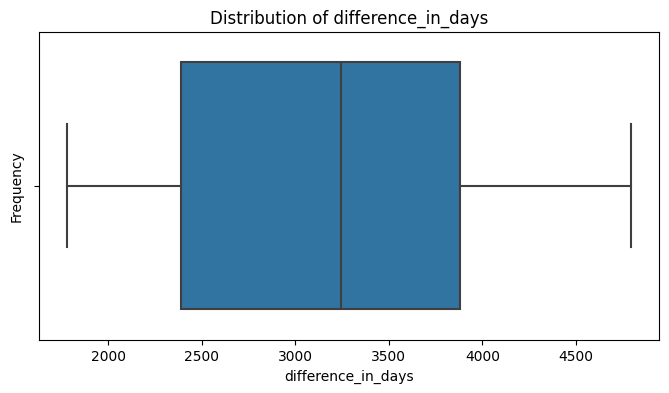

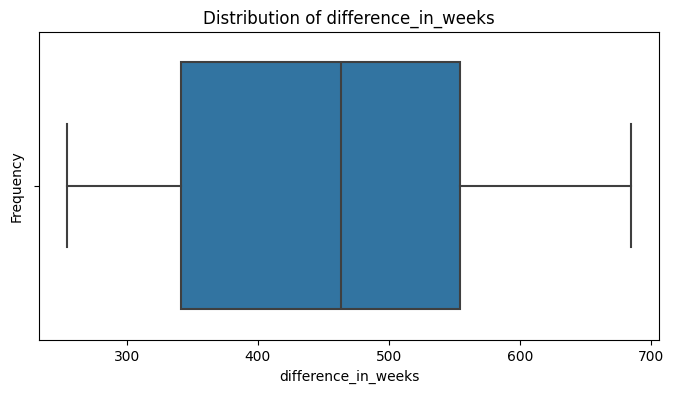

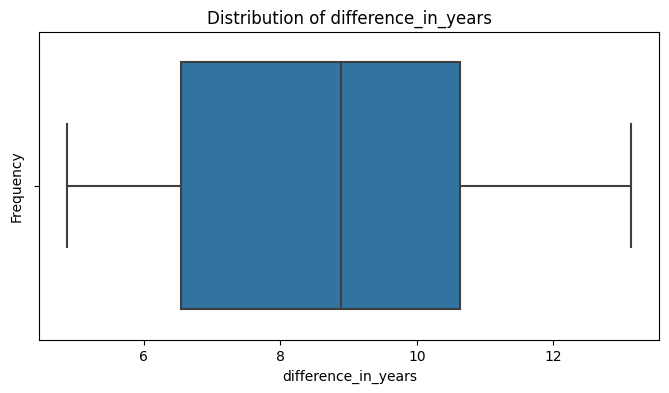

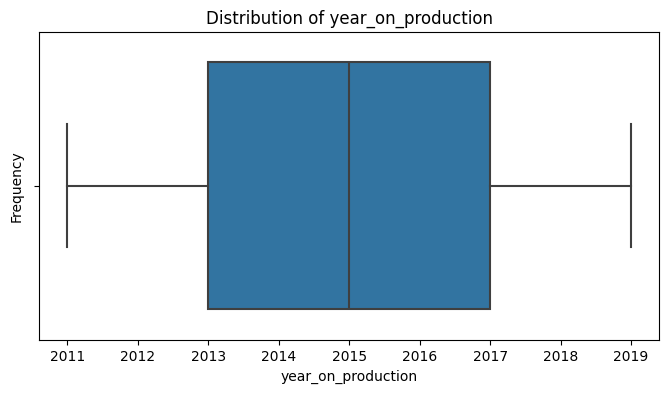

In [85]:
for numerical_column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[numerical_column])
    plt.title(f"Distribution of {numerical_column}")
    plt.xlabel(numerical_column)
    plt.ylabel("Frequency")
    plt.savefig(f"../images/eda/boxplots/{numerical_column}.png", bbox_inches="tight")
    plt.show()

# Countplots

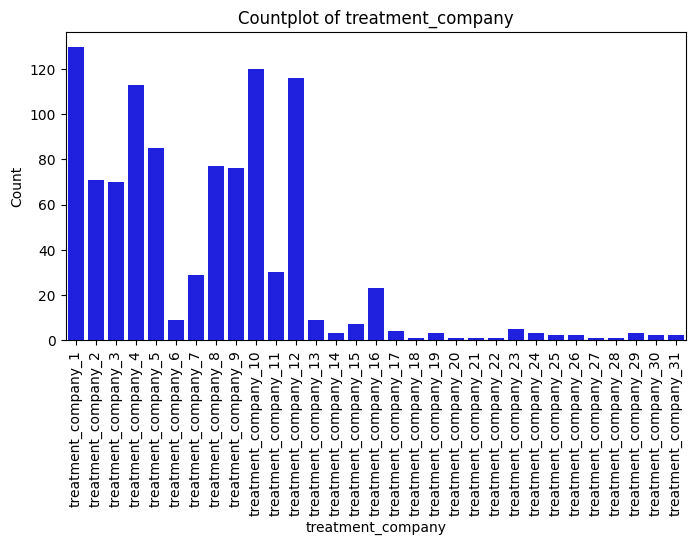

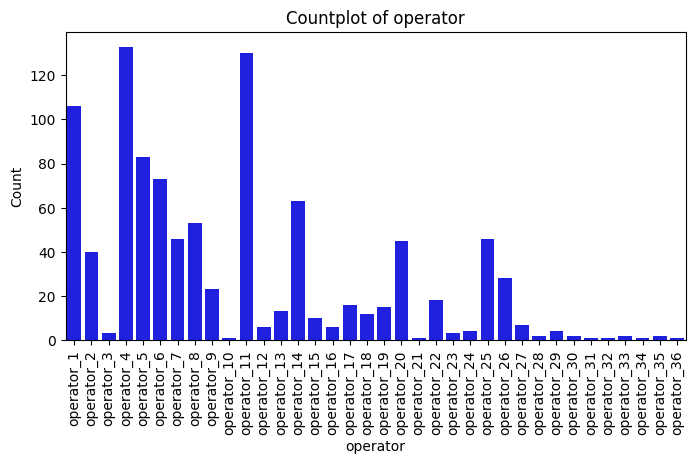

In [86]:
for cat_column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=cat_column, color="blue")
    plt.title(f"Countplot of {cat_column}")
    plt.xlabel(cat_column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.savefig(f"../images/eda/countplots/{cat_column}.png", bbox_inches="tight")
    plt.show()

Spearman coefficient: 0.16


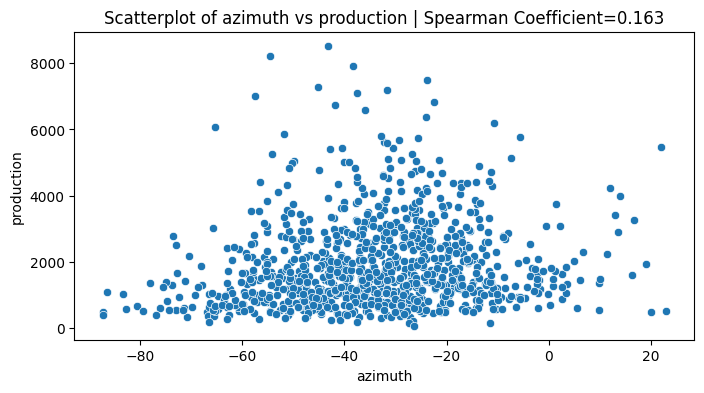

Spearman coefficient: 0.56


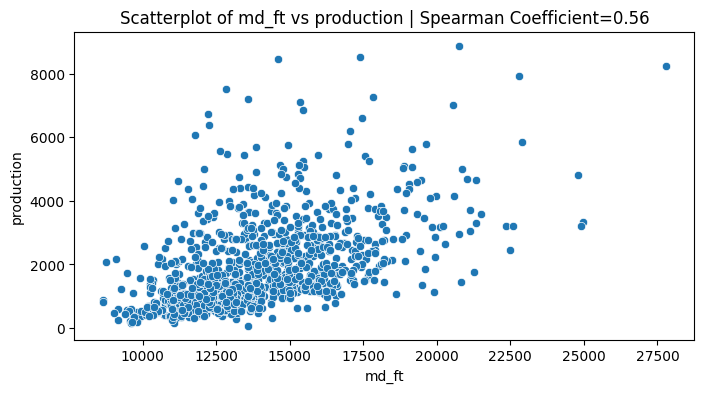

Spearman coefficient: 0.25


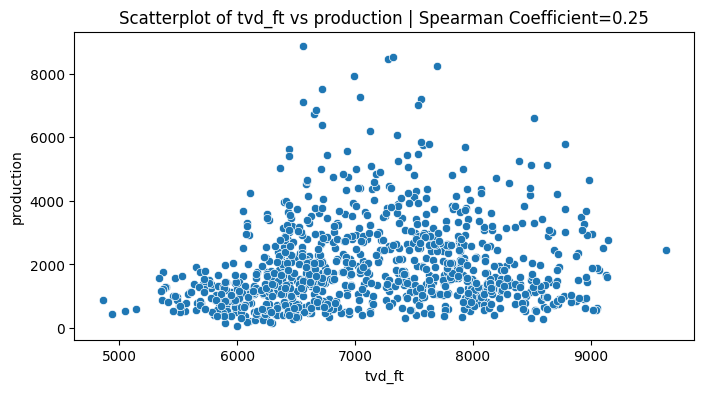

Spearman coefficient: 0.49


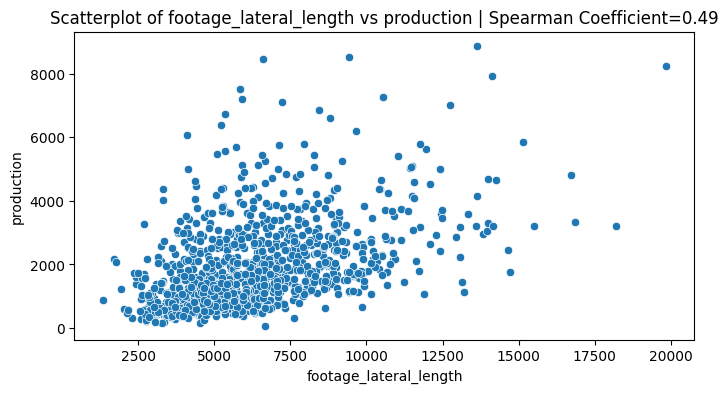

Spearman coefficient: 0.02


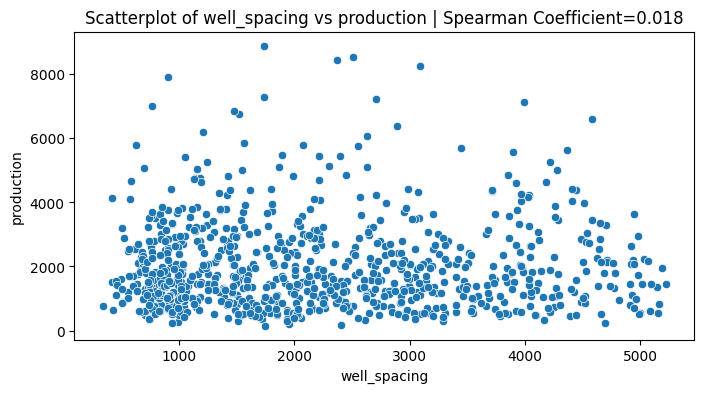

Spearman coefficient: 0.01


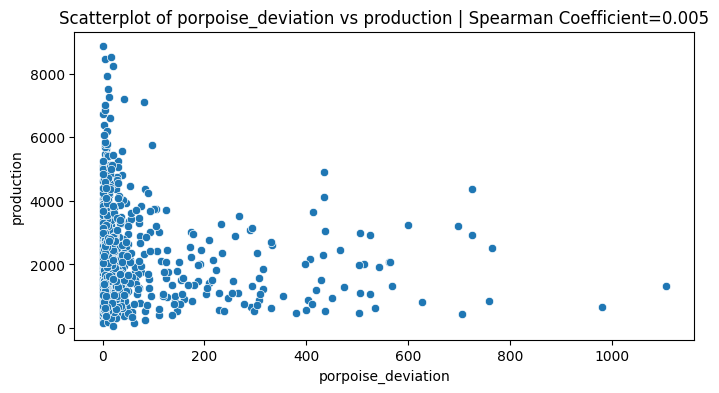

Spearman coefficient: -0.00


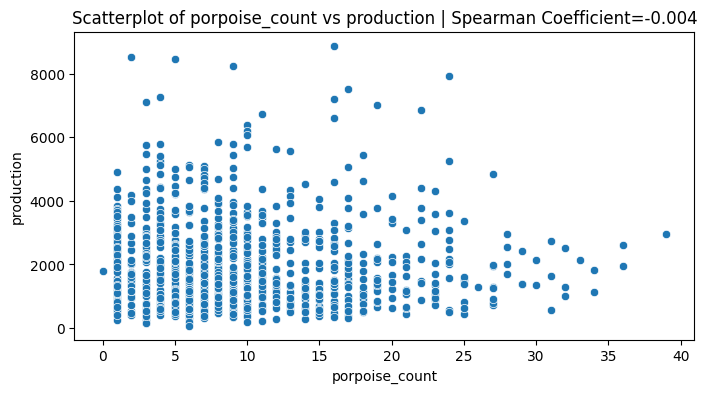

Spearman coefficient: 0.02


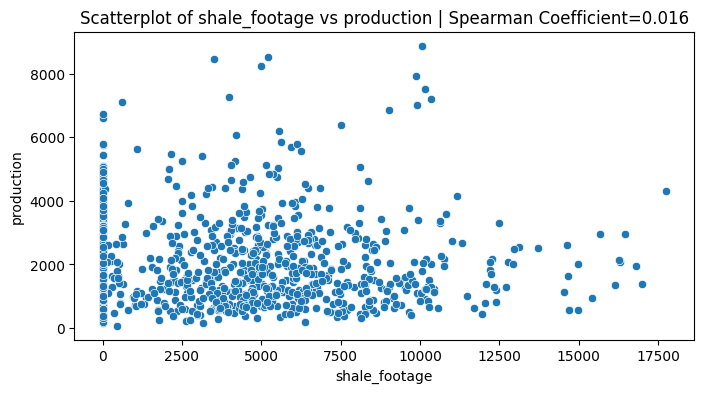

Spearman coefficient: -0.06


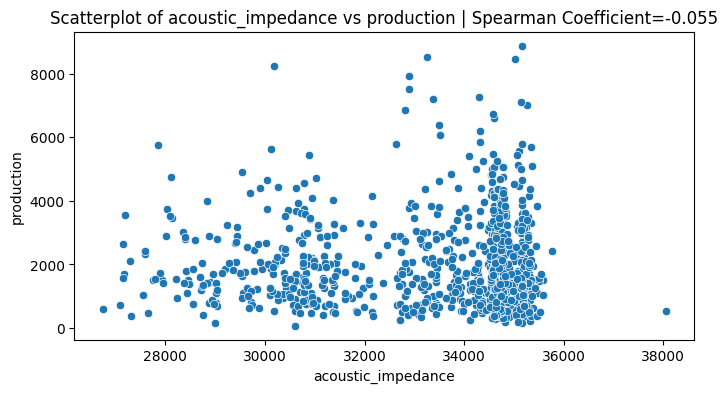

Spearman coefficient: 0.07


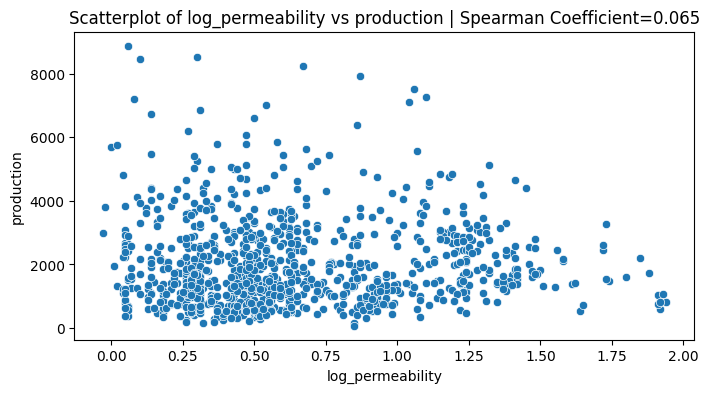

Spearman coefficient: 0.14


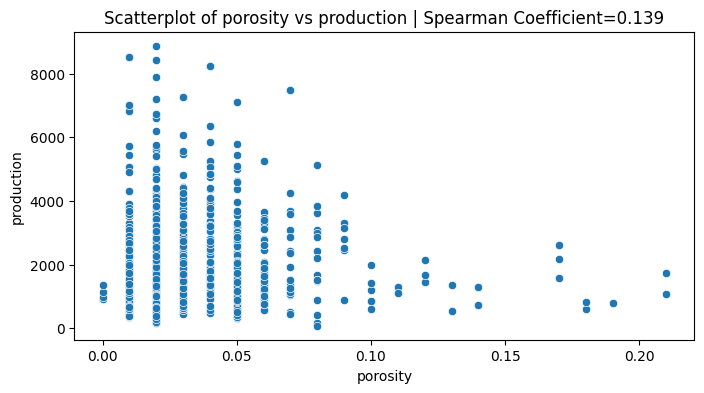

Spearman coefficient: -0.10


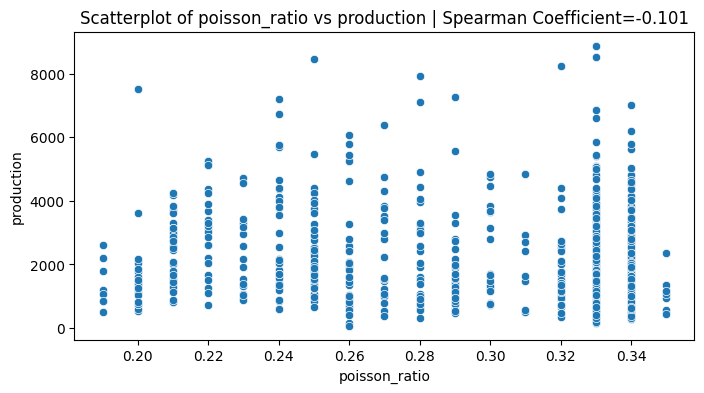

Spearman coefficient: -0.01


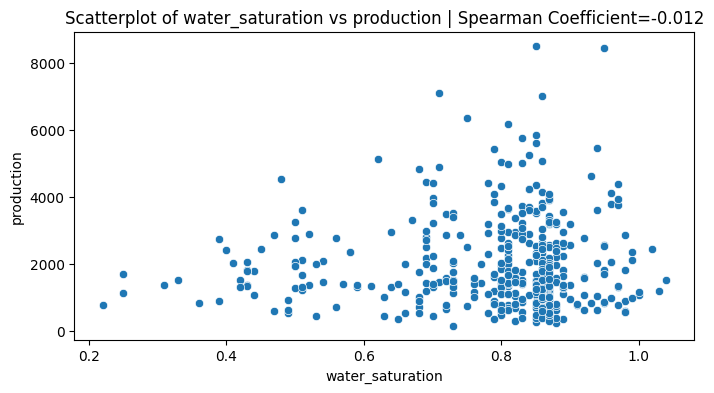

Spearman coefficient: -0.17


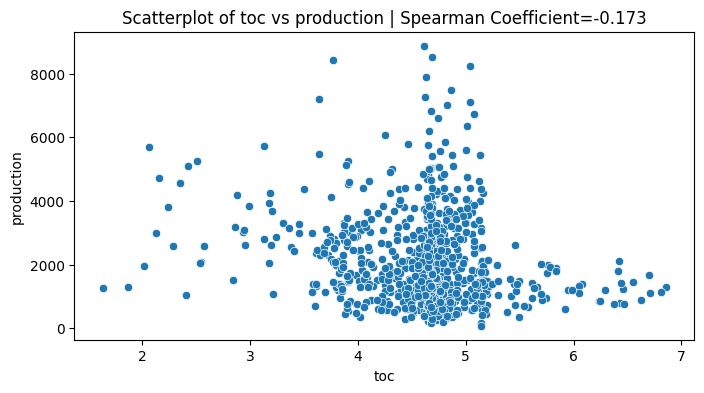

Spearman coefficient: 0.01


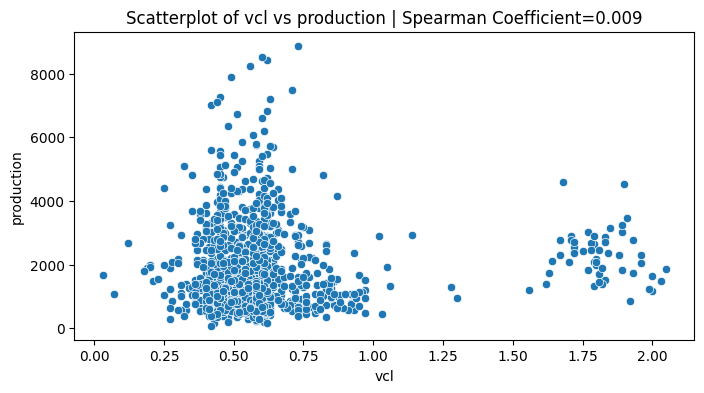

Spearman coefficient: -0.21


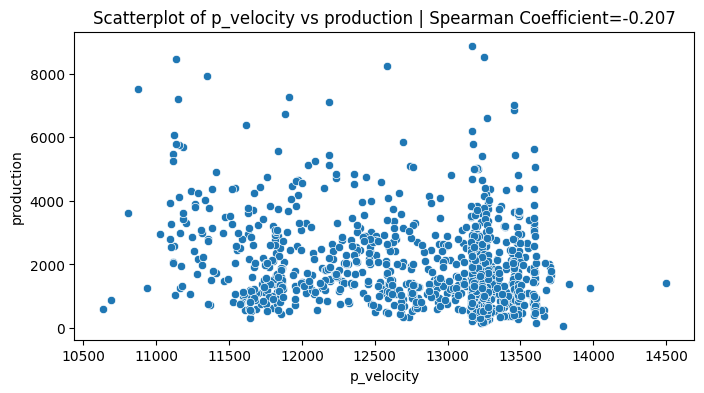

Spearman coefficient: -0.27


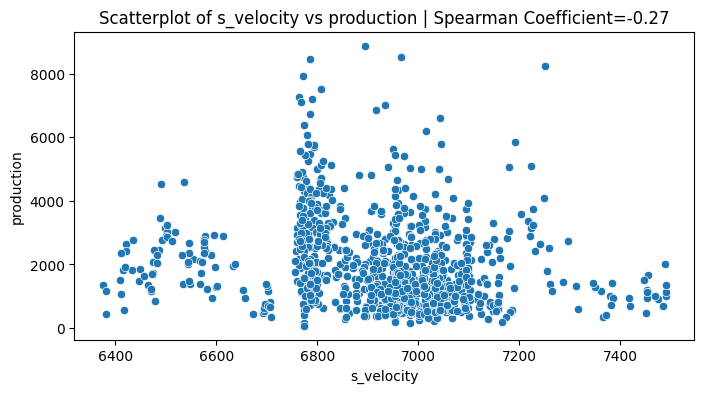

Spearman coefficient: -0.27


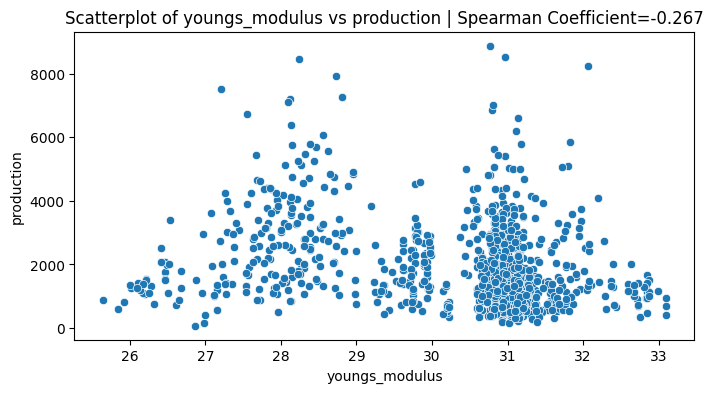

Spearman coefficient: 0.19


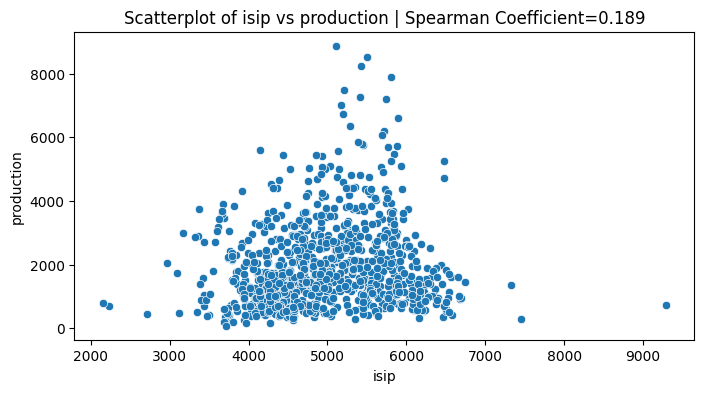

Spearman coefficient: 0.05


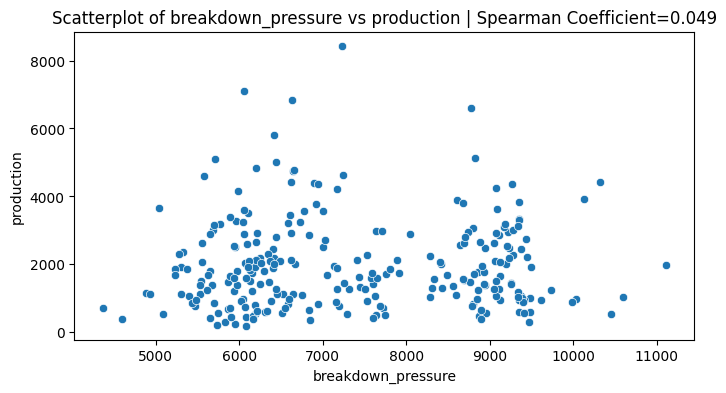

Spearman coefficient: 0.14


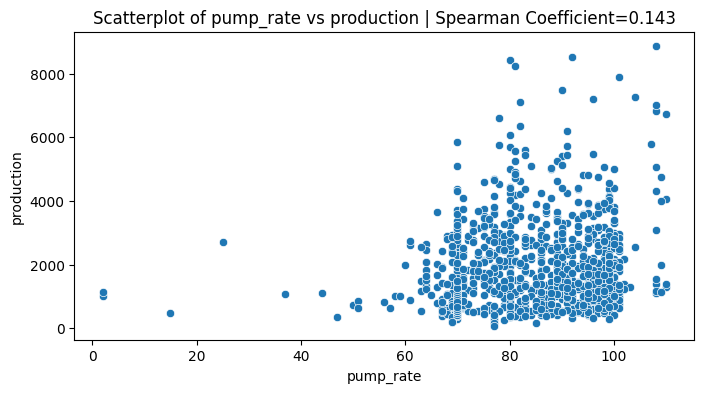

Spearman coefficient: 0.52


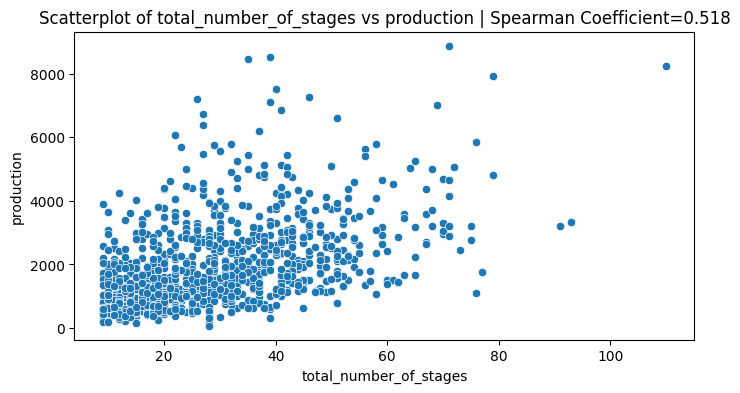

Spearman coefficient: 0.57


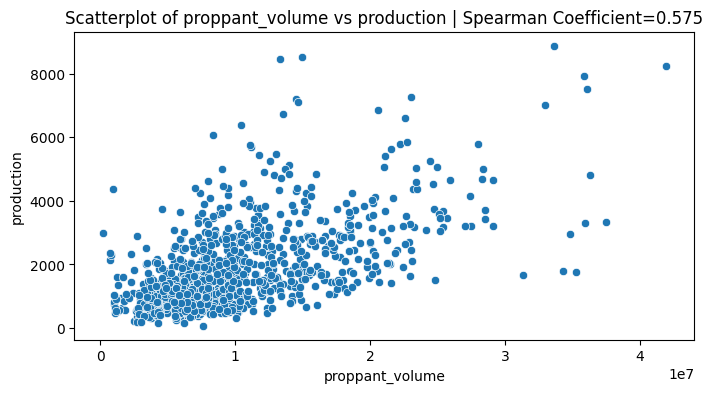

Spearman coefficient: 0.14


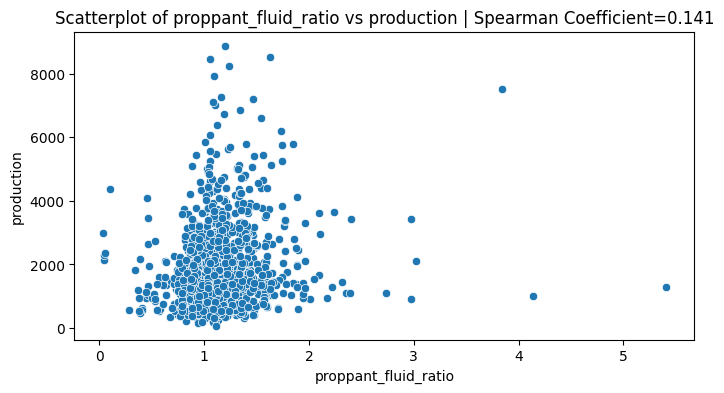

Spearman coefficient: -0.47


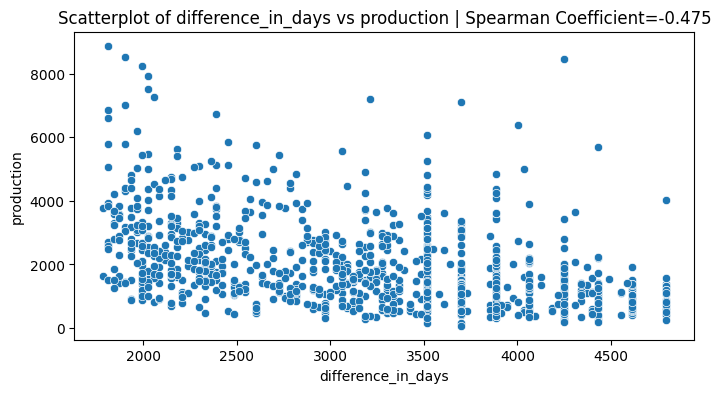

Spearman coefficient: -0.47


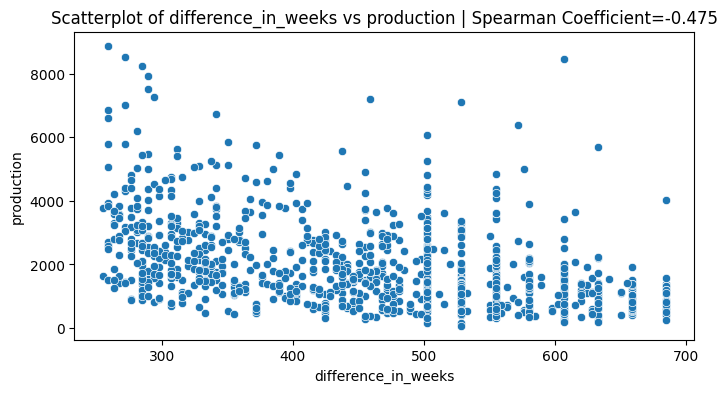

Spearman coefficient: -0.47


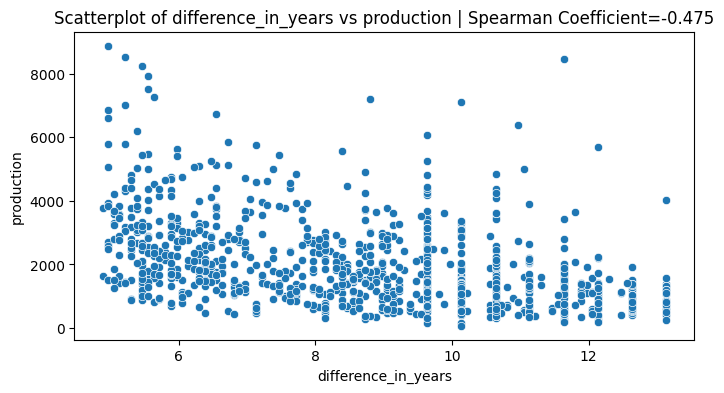

Spearman coefficient: 0.47


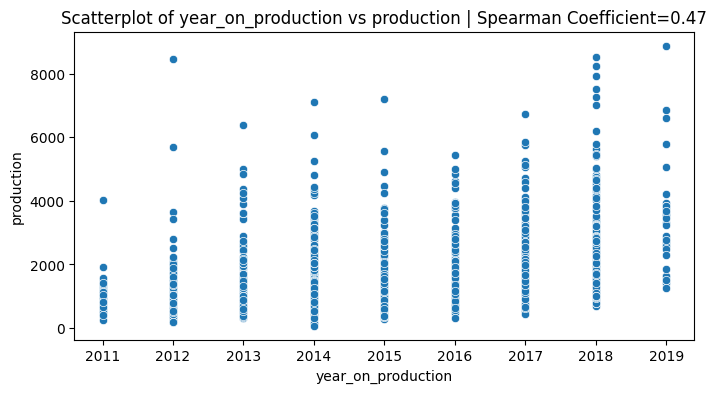

In [87]:
for numerical_column in numerical_columns:
    
    if numerical_column=="production":
        continue
    
    spearman_corr = df[numerical_column].corr(df["production"], method='spearman').round(3)
    print(f"Spearman coefficient: {spearman_corr:.2f}")
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=numerical_column, y="production")
    plt.title(f"Scatterplot of {numerical_column} vs production | Spearman Coefficient={spearman_corr}")
    plt.xlabel(numerical_column)
    plt.ylabel("production")
    
    if spearman_corr >= 0.7:
        folder = "high_positive"
    elif spearman_corr >= 0.4:
        folder = "medium_positive"
    elif spearman_corr >= 0.1:
        folder = "low_positive"
    elif spearman_corr <= -0.7:
        folder = "high_negative"
    elif spearman_corr <= -0.4:
        folder = "medium_negative"
    elif spearman_corr <= -0.1:
        folder = "low_negative"
    else:
        folder = "null_linear"
    
    plt.savefig(f"../images/eda/scatterplots/{folder}/{numerical_column}_vs_production.png")
        
    plt.show()
    


# Testing for multicolinearity (neeeding to impute missing values)

In [88]:
df_imputed = df[numerical_columns]

In [89]:
imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=numerical_columns)

In [90]:
df_imputed

,azimuth,md_ft,tvd_ft,footage_lateral_length,well_spacing,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,...,breakdown_pressure,pump_rate,total_number_of_stages,proppant_volume,proppant_fluid_ratio,production,difference_in_days,difference_in_weeks,difference_in_years,year_on_production
0,-32.279999,19148.0,6443.0,11966.0,4368.46290,6.33,12.0,1093.0,30123.20,0.68,...,7018.0,83.0,56.0,21568792.0,1.23,5614.947951,2179.0,311.285714,5.969863,2018.0
1,-19.799999,15150.0,7602.0,6890.0,4714.99220,1.28,4.0,0.0,30951.61,1.85,...,7018.0,102.0,33.0,9841307.0,1.47,2188.836707,3518.0,502.571429,9.638356,2014.0
2,-26.879999,14950.0,5907.0,8793.0,798.92096,2.03,6.0,3254.0,28900.25,0.29,...,7018.0,88.0,62.0,17116240.0,1.67,1450.033022,2026.0,289.428571,5.550685,2018.0
3,-49.099998,11098.0,6538.0,4234.0,1999.29525,6.00,23.0,7470.0,32826.08,0.73,...,7018.0,100.0,11.0,3749559.0,0.77,1060.764407,4430.0,632.857143,12.136986,2012.0
4,5.560000,10549.0,7024.0,2972.0,2967.56300,11.87,9.0,3637.0,26740.05,0.47,...,7018.0,94.0,9.0,6690705.0,1.32,607.530385,4430.0,632.857143,12.136986,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-15.980000,13750.0,7301.0,6006.0,1438.41020,6.30,7.0,3870.0,34333.88,0.54,...,7018.0,90.0,20.0,7062412.0,1.21,4395.234931,2391.0,341.571429,6.550685,2017.0
996,-18.080000,17333.0,6551.0,10279.0,764.44165,2.54,17.0,0.0,34981.49,0.48,...,7018.0,94.0,51.0,9082286.0,1.34,2263.065149,2179.0,311.285714,5.969863,2018.0
997,-34.430000,19772.0,7598.0,11568.0,569.40991,6.73,8.0,0.0,30937.60,0.68,...,7018.0,88.0,58.0,21720556.0,1.14,4094.018209,1965.0,280.714286,5.383562,2018.0
998,-28.540001,11920.0,5475.0,5929.0,1999.29525,6.44,7.0,0.0,34744.92,0.59,...,7018.0,100.0,32.0,13430880.0,0.95,1000.295063,2026.0,289.428571,5.550685,2018.0


# Multicolinearity of shortlisted features

In [91]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df_imputed[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif


In [94]:
features = ["year_on_production", "footage_lateral_length", "md_ft", "proppant_volume", "total_number_of_stages", "azimuth", "isip", "porosity", "proppant_fluid_ratio", "pump_rate", "tvd_ft"]
compute_vif(features).sort_values('VIF', ascending=False)

,Variable,VIF
2,md_ft,55.359738
1,footage_lateral_length,54.876230
10,tvd_ft,7.882327
4,total_number_of_stages,4.855078
3,proppant_volume,3.478791
6,isip,2.225704
0,year_on_production,1.949867
8,proppant_fluid_ratio,1.386120
9,pump_rate,1.135145
7,porosity,1.112566


In [93]:
features = ["footage_lateral_length", "proppant_volume", "total_number_of_stages", "azimuth", "isip", "porosity", "proppant_fluid_ratio", "pump_rate", "tvd_ft"]
compute_vif(features).sort_values('VIF', ascending=False)


,Variable,VIF
2,total_number_of_stages,4.116820
0,footage_lateral_length,3.553398
1,proppant_volume,3.429870
4,isip,2.145902
8,tvd_ft,2.143075
6,proppant_fluid_ratio,1.359736
5,porosity,1.106499
7,pump_rate,1.084319
3,azimuth,1.051760
